<a href="https://colab.research.google.com/github/Frayeur/HW/blob/master/Seq2Seq_%EC%9A%94%EC%95%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequence to sequence**

Seq2seq는 2개의 RNN모델을 합쳐 놓은 것으로서, encoder, decoder로 이루어진다. 
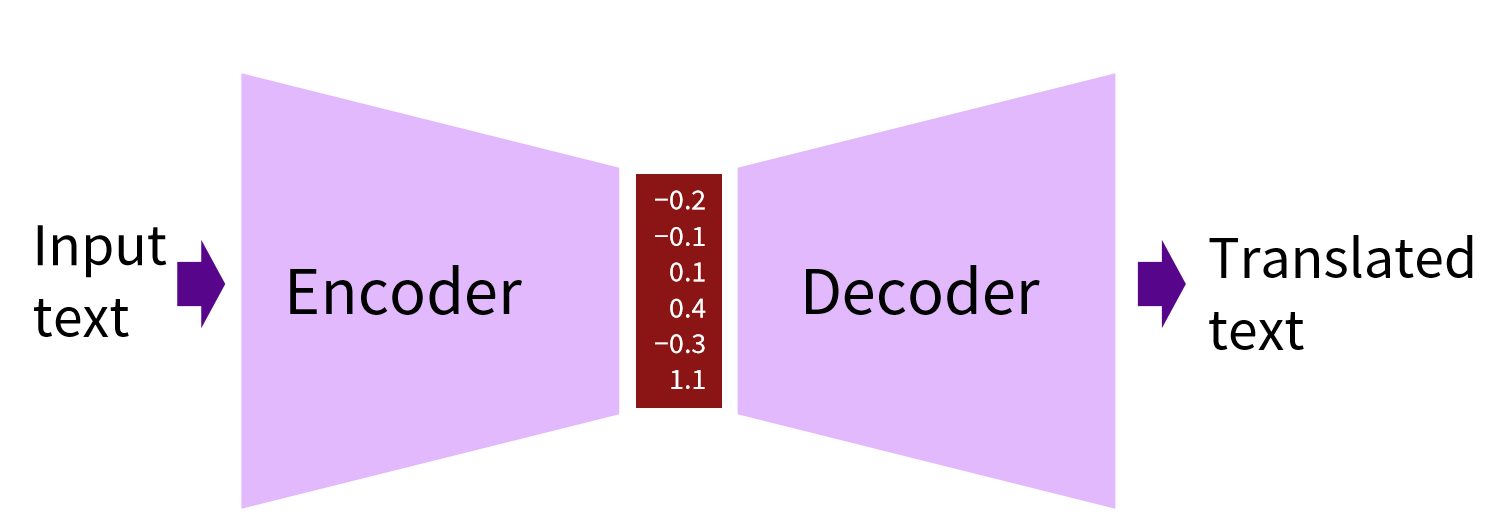

-encoder에서는 기본적으로 모델의 input 시퀀스로부터 고정된 사이즈의 context vector을 만든다.

-decoder에서는 이 context vector를 다시 input으로 하여 번역된 output 시퀀스를 만든다.

이러한 구조 때문에 Seq2Seq는 종종 “encoder decoder model”이라고 불린다.





## **1. Encoder**

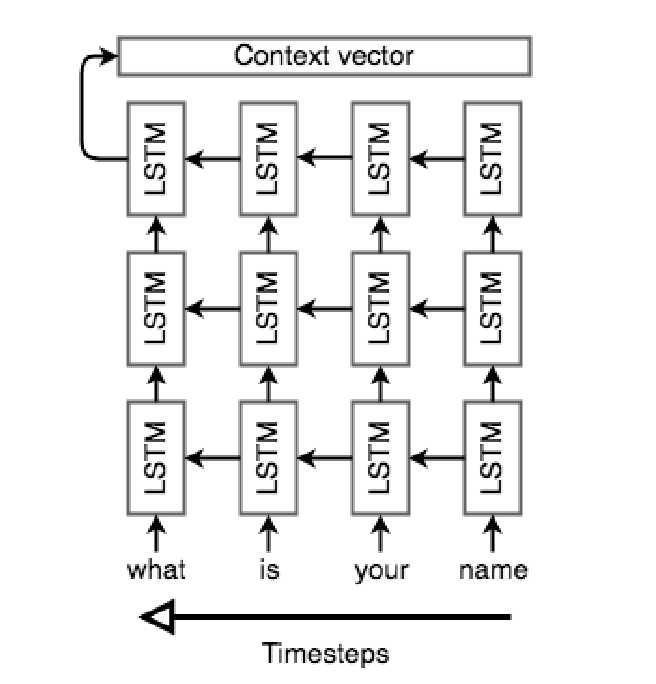

인코더의 역할은 그림에서 보다시피 input 시퀀스를 하나의 context vector C로 만드는 일이다. 이렇게 input 단어를 한 개씩 읽기 위해서 인코더는 RNN 중 LSTM을 주로 활용한다.

input 시퀀스의 길이가 그 때 그 때 바뀌지만 항상 일정한 길이의 C로 시퀀스를 압축해야 한다는 어려움이 있기 때문에 인코더는 대부분 그림처럼 stacked LSTM으로 구성한다. 이 LSTM layer들은 이전 layer의 output을 다음 layer로 전달하면서 input 시퀀스를 성공적으로 압축하는데 사용된다.

그림에서 “name your is what” 순서로 시퀀스를 뒤집어서 입력하게 되는데, 이는 첫 단어를 마지막으로 입력함으로서, 후에 decoder가 첫 단어인 what 부터 잘 번역할 수 있도록 하려는 의도이다. decoder는 일단 what이 잘 번역되면 뒷 단어들도 이의 영향으로 차례로 잘 번역될 수 있도록 설계되어 있다.



## **Decoder**

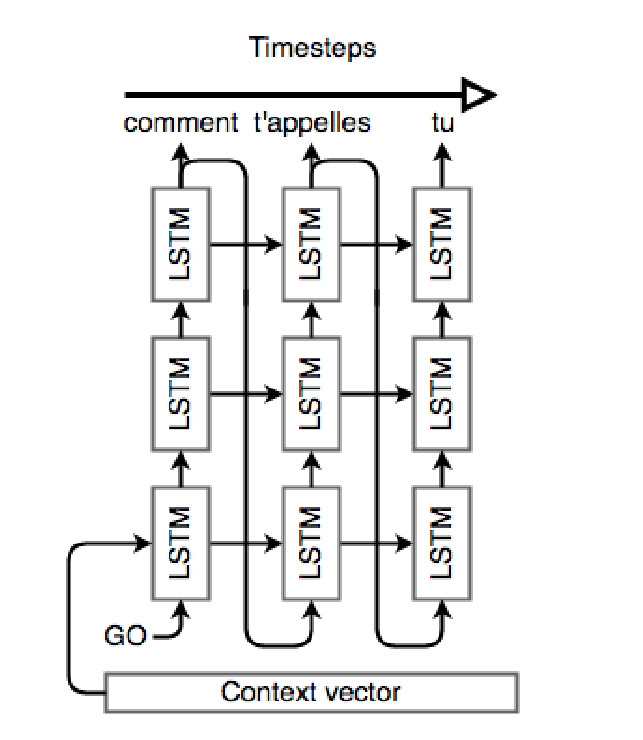

디코더의 구조를 보면 인코더와 마찬가지로 stacked LSTM구조를 사용하는 것은 동일하다.

하지만 인코더와의 큰 차이점이 있는데,

-네트워크를 인코딩 완료된 context vector로 초기화 한다는 점

-stacked LSTM의 마지막 레이어로부터 나온 output word를 다시 다음 input에 사용한다는 점

위의 두 가지가 인코더와의 큰 차이점이다.


또한 input과 output에 활용되는 시퀀스의 길이가 각각 달라도 다른 길이의 output이 가능한 이유는 아래 그림과 같다.

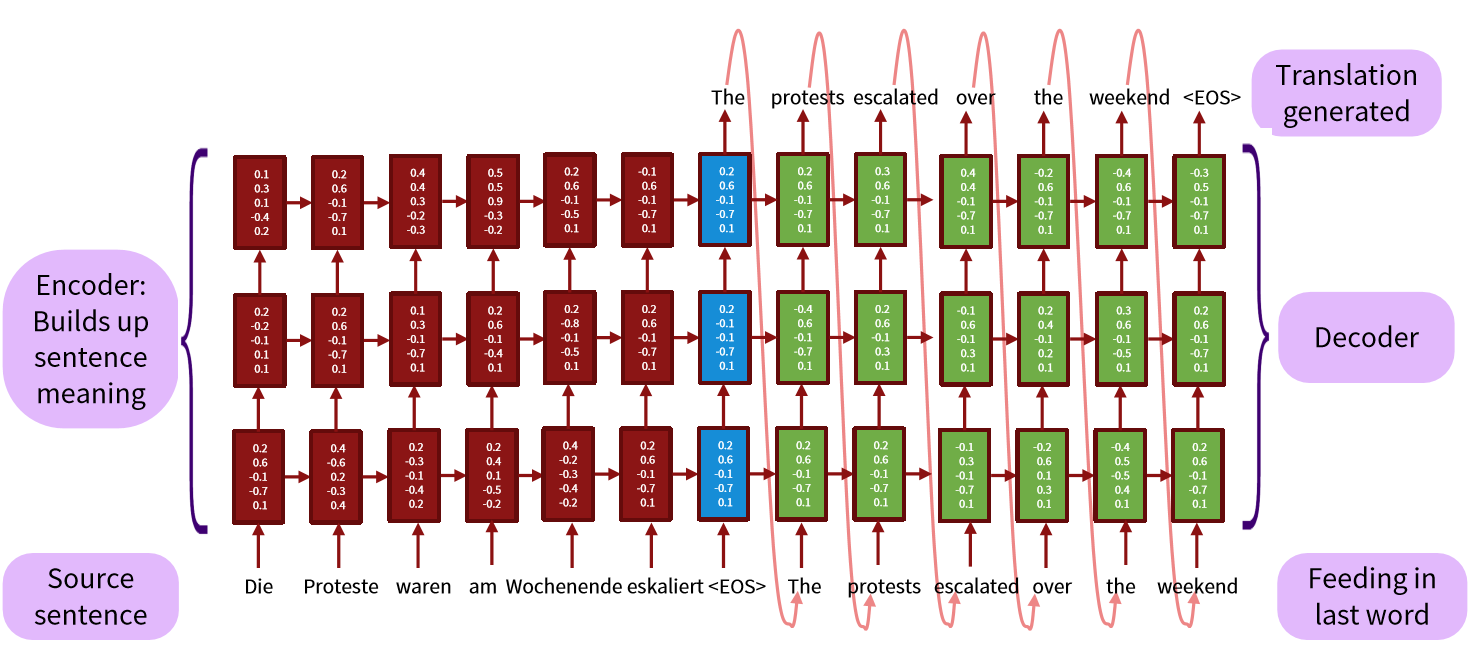

바로 인코더와 디코더에서 라는 토큰을 사용하여 문장의 입력과 출력이 끝남을 네트워크에 전달한다.

여기서 또 주목할만한 점은 인코더와 디코더가 동시에 학습된다는 점이다. 위와 같이 긴 옆으로 긴 인코더, 디코더가 한꺼번에 forward-propagate되었다가 loss function에 근거한 back-propagation을 통해 이 네트워크에 사용되는 모든 파라미터가 1번 업데이트 된다.




## **Seq2Seq의 장점과 단점**

**장점**

과거의 구문 베이스의 번역 시스템이 long-term dependency를 해결하기 어려운 구조였던 것에 비해 Seq2Seq는 전체 input을 훑어본 뒤에 임의의 어떤 시퀀스를 출력할 수 있으며, 효율적인 번역을 위해 input의 특정 부분만을 집중하여 살펴볼 수도 있다.

**단점**

시퀀스의 입력과 출력 길이에 어떠한 제약도 없다는 것은 사실이지만, Seq2Seq 모델은 LSTM의 한계때문에 입력 문장이 매우 길면 효율적으로 학습하지 못한다

